In [85]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [87]:
#movies = # Write your code for importing the csv file here

movies=pd.read_csv('Movie Assignment Data.csv')


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [88]:
# Write your code for inspection here
movies.columns
movies.dtypes
movies.shape

(5043, 28)

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [90]:
# Write your code for column-wise null count here
#null_value_df=pd.DataFrame({'column_name':movies.columns,
 #                          'column_null_value_count':movies.isnull().sum(),
  #                         })
#null_value_df
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [91]:
# Write your code for row-wise null count here
movies.isnull().sum(axis=1)
                        
                           



0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [92]:
# Write your code for column-wise null percentages here
#pd.DataFrame({'column_name':movies.columns,
 #                          'null_value_count':movies.isnull().sum(),
  #                         'null_value_percentage':(movies.isnull().sum()/movies.shape[0]*100).round(2)})
movies.isnull().mean().round(4)*100

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [93]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies=pd.read_csv('Movie Assignment Data.csv')
cols_to_drop=['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords']
cols_to_drop
movies.drop(columns=cols_to_drop, inplace=True,axis=1)
movies.shape
movies.head()
movies.columns

Index(['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [94]:
# Write your code for dropping the rows here

pd.options.display.max_columns=100 # to display columns above 20 and below 100

movies=pd.read_csv('Movie Assignment Data.csv')
#movies.head()
#movies.info()
#movies.isna().mean().round(4)*100
#movies.drop(rows=null_value, inplace=True,axis=0)
#rows_to_drop=['gross','budget']
#movies.drop(columns=['gross'], inplace=True)
#movies

#movies.shape()

#drop_list=list(movies.columns[round(movies.isnull().sum()/len(movies)*100,2)>5])
drop_list
#movies.drop(columns=drop_list,inplace=True,axis=1)
#movies[~np.isnan(movies['gross'])]
#movies[~np.isnan(movies['budget'])]
#movies = movies[movies.isnull().sum(axis=1) <= 5]
movies

NameError: name 'drop_list' is not defined

# -  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [95]:
# Write your code for filling the NaN values in the 'language' column here
movies['language'] = movies.language.fillna('English')
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,English,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [96]:
# Write your code for checking number of retained rows here

n_rows_org=print('No. of retained rows:{0} \nNumber of retained columns: {1}'.format(movies.shape[0],movies.shape[1]))

n=len(movies.index)/3891
n

No. of retained rows:5043 
Number of retained columns: 28


1.2960678488820354

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

# Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [97]:
# Write your code for unit conversion here

movies.budget = round(movies["budget"]/1000000,4)
movies.gross = round(movies['gross']/1000000,4)
movies.dropna(inplace=True)
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.4042,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0742,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.1306,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0587,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.7000,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.1360,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,0.0045,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,0.6738,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,0.0100,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.4248,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,0.0070,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.0409,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,0.0070,1992.0,20.0,6.9,1.37,0


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [98]:
# Write your code for creating the profit column here
movies['profit']=movies['gross']-movies['budget']
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.5058
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.4042,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.4042
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0742,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.9258
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.1306,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.1306
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0587,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.7000,2012.0,632.0,6.6,2.35,24000,-190.6413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.1360,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,0.0045,2004.0,133.0,6.9,2.35,171,0.1315
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,0.6738,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,0.0100,2000.0,0.0,7.5,1.85,697,0.6638
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.4248,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,0.0070,2004.0,45.0,7.0,1.85,19000,0.4178
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.0409,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,0.0070,1992.0,20.0,6.9,1.37,0,2.0339


In [99]:
# Write your code for sorting the dataframe here
movies.sort_values(by='profit', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.5058
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.1773,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150.0000,2015.0,2000.0,7.0,2.00,150000,502.1773
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.6723,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200.0000,1997.0,14000.0,7.7,2.35,26000,458.6723
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.9357,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11.0000,1977.0,1000.0,8.7,2.35,33000,449.9357
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.9495,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,Peter Coyote,0.0,bicyclist|boy|doll|star wars reference|voice i...,http://www.imdb.com/title/tt0083866/?ref_=fn_t...,515.0,English,USA,PG,10.5000,1982.0,725.0,7.9,1.85,34000,424.4495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,0.4104,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2127.5199,2004.0,336.0,6.9,1.85,973,-2127.1095
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2.2982,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2400.0000,1997.0,851.0,8.4,1.85,11000,-2397.7018
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,0.1959,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2500.0000,2005.0,2.0,7.1,2.35,607,-2499.8041
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,0.2117,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4200.0000,2005.0,126.0,7.7,2.35,4000,-4199.7883


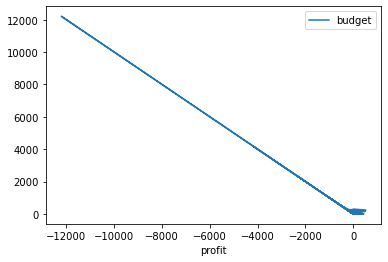

In [100]:
# Write code for profit vs budget plot here

import matplotlib.pyplot as plt
movies.plot(x="profit", y=["budget"])
plt.show()


In [101]:
#top10 = # Write your code to get the top 10 profiting movies here
top10=movies.sort_values(by='profit', ascending=False).head(10)
top10

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,1.78,33000,523.5058
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.1773,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150.0,2015.0,2000.0,7.0,2.00,150000,502.1773
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.6723,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200.0,1997.0,14000.0,7.7,2.35,26000,458.6723
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.9357,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11.0,1977.0,1000.0,8.7,2.35,33000,449.9357
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.9495,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,Peter Coyote,0.0,bicyclist|boy|doll|star wars reference|voice i...,http://www.imdb.com/title/tt0083866/?ref_=fn_t...,515.0,English,USA,PG,10.5,1982.0,725.0,7.9,1.85,34000,424.4495
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623.2795,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220.0,2012.0,21000.0,8.1,1.85,123000,403.2795
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623.2795,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220.0,2012.0,21000.0,8.1,1.85,123000,403.2795
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422.7838,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0.0,king|prince|scar|uncle|unnecessary guilt,http://www.imdb.com/title/tt0110357/?ref_=fn_t...,656.0,English,USA,G,45.0,1994.0,886.0,8.5,1.66,17000,377.7838
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474.5447,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115.0,1999.0,14000.0,6.5,2.35,13000,359.5447
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3161,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185.0,2008.0,13000.0,9.0,2.35,37000,348.3161


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [102]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(subset=['movie_title'], inplace=True, keep='first')



In [103]:
# Write code for repeating subtask 2 here
movies.sort_values(by='profit', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009.0,936.0,7.9,1.78,33000,523.5058
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.1773,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150.0,2015.0,2000.0,7.0,2.00,150000,502.1773
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.6723,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200.0,1997.0,14000.0,7.7,2.35,26000,458.6723
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.9357,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11.0,1977.0,1000.0,8.7,2.35,33000,449.9357
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.9495,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,Peter Coyote,0.0,bicyclist|boy|doll|star wars reference|voice i...,http://www.imdb.com/title/tt0083866/?ref_=fn_t...,515.0,English,USA,PG,10.5,1982.0,725.0,7.9,1.85,34000,424.4495
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623.2795,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220.0,2012.0,21000.0,8.1,1.85,123000,403.2795
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422.7838,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0.0,king|prince|scar|uncle|unnecessary guilt,http://www.imdb.com/title/tt0110357/?ref_=fn_t...,656.0,English,USA,G,45.0,1994.0,886.0,8.5,1.66,17000,377.7838
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474.5447,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115.0,1999.0,14000.0,6.5,2.35,13000,359.5447
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3161,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185.0,2008.0,13000.0,9.0,2.35,37000,348.3161
439,Color,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,407.9993,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,49942,Anthony Reynolds,0.0,fight to the death|game|massacre|self survival...,http://www.imdb.com/title/tt1392170/?ref_=fn_t...,1959.0,English,USA,PG-13,78.0,2012.0,14000.0,7.3,2.35,140000,329.9993


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

# -  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [104]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
pd.set_option('display.max_rows', 250)
IMDB_Top_250 = movies[movies['num_voted_users']>25000].sort_values(by='imdb_score', ascending=False).head(250)

IMDB_Top_250['Rank']=list(range(1, 251))
IMDB_Top_250

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,Rank
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.3415,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25.0000,1994.0,745.0,9.3,1.85,108000,3.3415,1
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.8220,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|r...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6.0000,1972.0,10000.0,9.2,1.85,43000,128.8220,2
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.3161,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185.0000,2008.0,13000.0,9.0,2.35,37000,348.3161,3
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.3000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|mel...,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,650.0,English,USA,R,13.0000,1974.0,14000.0,9.0,1.85,14000,44.3000,4
1874,Black and White,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96.0672,Biography|Drama|History,Liam Neeson,Schindler's List,865020,15233,Caroline Goodall,0.0,german|german soldier|jew|jewish|nazi,http://www.imdb.com/title/tt0108052/?ref_=fn_t...,1273.0,English,USA,R,22.0000,1993.0,795.0,8.9,1.85,41000,74.0672,5
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.9300,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,1.0,black comedy|cunnilingus|neo noir|nonlinear ti...,http://www.imdb.com/title/tt0110912/?ref_=fn_t...,2195.0,English,USA,R,8.0000,1994.0,902.0,8.9,2.35,45000,99.9300,6
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377.0193,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,3189.0,English,USA,PG-13,94.0000,2003.0,857.0,8.9,2.35,16000,283.0193,7
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6.1000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1.2000,1966.0,34.0,8.9,2.35,20000,4.9000,8
836,Black and White,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329.6912,Comedy|Drama,Tom Hanks,Forrest Gump,1251222,15700,Sam Anderson,0.0,amputee|love|vietnam|vietnam war|war hero,http://www.imdb.com/title/tt0109830/?ref_=fn_t...,1398.0,English,USA,PG-13,55.0000,1994.0,294.0,8.8,2.35,59000,274.6912,9
2051,Color,Irvin Kershner,223.0,127.0,883.0,441.0,Kenny Baker,11000.0,290.1588,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode V - The Empire Strikes Back,837759,12643,Anthony Daniels,0.0,duel|famous twist|rebel|rescue|snowy landscape,http://www.imdb.com/title/tt0080684/?ref_=fn_t...,900.0,English,USA,PG,18.0000,1980.0,504.0,8.8,2.35,17000,272.1588,10


In [105]:
#Top_Foreign_Lang_Film = # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film = IMDB_Top_250[IMDB_Top_250['language'] != 'English']
Top_Foreign_Lang_Film

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,Rank
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6.1000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1.20,1966.0,34.0,8.9,2.35,20000,4.9000,8
4029,Color,Fernando Meirelles,214.0,135.0,353.0,40.0,Seu Jorge,1000.0,7.5634,Crime|Drama,Alice Braga,City of God,533200,1211,Alexandre Rodrigues,0.0,coming of age|male frontal nudity|male nudity|...,http://www.imdb.com/title/tt0317248/?ref_=fn_t...,749.0,Portuguese,Brazil,R,3.30,2002.0,69.0,8.7,1.85,28000,4.2634,15
4747,Black and White,Akira Kurosawa,153.0,202.0,0.0,4.0,Minoru Chiaki,304.0,0.2691,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,338,Kamatari Fujiwara,6.0,16th century|battle|japan|practice|samurai,http://www.imdb.com/title/tt0047478/?ref_=fn_t...,596.0,Japanese,Japan,Unrated,2.00,1954.0,8.0,8.7,1.37,11000,-1.7309,17
2373,Color,Hayao Miyazaki,246.0,125.0,6000.0,7.0,Ryûnosuke Kamiki,17.0,10.0499,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,44,Miyu Irino,0.0,anime|bathhouse|pig|spirit|work,http://www.imdb.com/title/tt0245429/?ref_=fn_t...,902.0,Japanese,Japan,PG,19.00,2001.0,10.0,8.6,1.85,28000,-8.9501,24
4259,Color,Florian Henckel von Donnersmarck,215.0,137.0,207.0,155.0,Ulrich Mühe,380.0,11.2847,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,927,Martina Gedeck,3.0,east germany|police|secret police|stasi|writer,http://www.imdb.com/title/tt0405094/?ref_=fn_t...,407.0,German,Germany,R,2.00,2006.0,284.0,8.5,2.35,39000,9.2847,37
4921,Color,Majid Majidi,46.0,89.0,373.0,27.0,Amir Farrokh Hashemian,36.0,0.9254,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,100,Mohammad Amir Naji,0.0,class|gardening|race|school|shoe,http://www.imdb.com/title/tt0118849/?ref_=fn_t...,130.0,Persian,Iran,PG,0.18,1997.0,35.0,8.5,1.85,0,0.7454,44
4105,Color,Chan-wook Park,305.0,120.0,0.0,38.0,Ji-tae Yu,717.0,2.1813,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,852,Hye-jeong Kang,0.0,brother sister relationship|hypnosis|imprisonm...,http://www.imdb.com/title/tt0364569/?ref_=fn_t...,809.0,Korean,South Korea,R,3.00,2003.0,78.0,8.4,2.35,43000,-0.8187,52
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2.2982,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2400.00,1997.0,851.0,8.4,1.85,11000,-2397.7018,54
2970,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11.4331,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,469,Herbert Grönemeyer,0.0,duty|submarine|submarine movie|tension|u boat,http://www.imdb.com/title/tt0082096/?ref_=fn_t...,426.0,German,West Germany,R,14.00,1981.0,21.0,8.4,1.85,11000,-2.5669,57
4659,Color,Asghar Farhadi,354.0,123.0,0.0,620.0,Leila Hatami,786.0,7.0985,Drama|Mystery,Shahab Hosseini,A Separation,151812,2501,Peyman Moaadi,2.0,alzheimer's disease|caregiver|divorce|iran|ira...,http://www.imdb.com/title/tt1832382/?ref_=fn_t...,264.0,Persian,Iran,PG-13,0.50,2011.0,712.0,8.4,1.85,48000,6.5985,58


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [106]:
# Write your code for extracting the top 10 directors here
director = movies.groupby('director_name')
temp1=director['imdb_score'].mean().sort_values(ascending=False)
top10director=pd.DataFrame({'mean_score':temp1}).reset_index().head(10)
top10director

,director_name,mean_score
0,Akira Kurosawa,8.700000
1,Tony Kaye,8.600000
2,Charles Chaplin,8.600000
3,Majid Majidi,8.500000
4,Alfred Hitchcock,8.500000
5,Ron Fricke,8.500000
6,Damien Chazelle,8.500000
7,Sergio Leone,8.433333
8,Christopher Nolan,8.425000
9,Asghar Farhadi,8.400000


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [107]:
# Write your code for extracting the first two genres of each movie here
movies['genre_1']=movies['genres'].str.split('|').str.get(0)
movies['genre_2']=movies['genres'].str.split('|').str.get(1)


movies['genre_2']=movies['genre_2'].fillna(movies['genre_1'])

movies


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.5058,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.4042,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.4042,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0742,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.9258,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.1306,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.1306,Action,Thriller
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0587,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.7000,2012.0,632.0,6.6,2.35,24000,-190.6413,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.1360,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,0.0045,2004.0,133.0,6.9,2.35,171,0.1315,Drama,Music
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,0.6738,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,0.0100,2000.0,0.0,7.5,1.85,697,0.6638,Drama,Drama
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.4248,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,0.0070,2004.0,45.0,7.0,1.85,19000,0.4178,Drama,Sci-Fi
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.0409,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,0.0070,1992.0,20.0,6.9,1.37,0,2.0339,Action,Crime


In [108]:
#movies_by_segment = # Write your code for grouping the dataframe here
movies_by_segment=movies.groupby(['genre_1', 'genre_2'])
movies_by_segment
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.5058,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.4042,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.4042,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0742,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.9258,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.1306,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.1306,Action,Thriller
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0587,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.7000,2012.0,632.0,6.6,2.35,24000,-190.6413,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.1360,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,0.0045,2004.0,133.0,6.9,2.35,171,0.1315,Drama,Music
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,0.6738,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,0.0100,2000.0,0.0,7.5,1.85,697,0.6638,Drama,Drama
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.4248,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,0.0070,2004.0,45.0,7.0,1.85,19000,0.4178,Drama,Sci-Fi
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.0409,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,0.0070,1992.0,20.0,6.9,1.37,0,2.0339,Action,Crime


In [110]:
#PopGenre = # Write your code for getting the 5 most popular combo of genres here
temp=movies_by_segment['gross'].mean().sort_values(ascending=False)
#temp1=director['imdb_score'].mean().sort_values(ascending=False)
PopGenre=pd.DataFrame({'Pop_Genre':temp}).reset_index().head(5)
PopGenre

,genre_1,genre_2,Pop_Genre
0,Family,Sci-Fi,434.949500
1,Adventure,Sci-Fi,228.627775
2,Adventure,Animation,117.926356
3,Adventure,Family,114.604893
4,Action,Adventure,109.006755


**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [121]:
# Write your code for creating three new dataframes here

#Meryl_Streep = # Include all movies in which Meryl_Streep is the lead
Meryl_Streep=movies[movies['actor_1_name'] == 'Meryl Streep']
Meryl_Streep



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.7035,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,15226,Zoe Kazan,2.0,affair|divorce|graduation|vomiting|watching te...,http://www.imdb.com/title/tt1230414/?ref_=fn_t...,214.0,English,USA,R,85.0,2009.0,2000.0,6.6,1.85,0,27.7035,Comedy,Drama
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46.8157,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,12161,William Lucking,1.0,criminal|rafting|river|robber|white water rafting,http://www.imdb.com/title/tt0110997/?ref_=fn_t...,69.0,English,USA,PG-13,45.0,1994.0,894.0,6.3,2.35,0,1.8157,Action,Adventure
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.1254,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,13321,Vanessa Ferlito,2.0,american|blog|book|cook|cooking,http://www.imdb.com/title/tt1135503/?ref_=fn_t...,277.0,English,USA,PG-13,40.0,2009.0,935.0,7.0,1.85,13000,54.1254,Biography,Drama
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.7330,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,23923,Rebecca Mader,0.0,fashion|fashion industry|magazine|new york cit...,http://www.imdb.com/title/tt0458352/?ref_=fn_t...,631.0,English,USA,PG-13,35.0,2006.0,11000.0,6.8,2.35,0,89.7330,Comedy,Drama
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14.9981,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,32875,Andrew Garfield,3.0,afghanistan|professor|reporter|student|university,http://www.imdb.com/title/tt0891527/?ref_=fn_t...,298.0,English,USA,R,35.0,2007.0,10000.0,6.2,2.35,0,-20.0019,Drama,Thriller
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.1000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,12518,Michael Kitchen,0.0,africa|hunter|love|marriage|plantation,http://www.imdb.com/title/tt0089755/?ref_=fn_t...,200.0,English,USA,PG,31.0,1985.0,920.0,7.2,1.85,0,56.1000,Biography,Drama
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63.5360,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,19420,Jean Smart,2.0,couple|intimacy|marriage|marriage counseling|m...,http://www.imdb.com/title/tt1535438/?ref_=fn_t...,178.0,English,USA,PG-13,30.0,2012.0,7000.0,6.3,2.35,0,33.5360,Comedy,Drama
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23.2094,Drama,Meryl Streep,One True Thing,9283,12785,Tom Everett Scott,3.0,cancer|job|love|new york|professor,http://www.imdb.com/title/tt0120776/?ref_=fn_t...,112.0,English,USA,R,30.0,1998.0,882.0,7.0,1.85,592,-6.7906,Drama,Drama
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.5978,Drama|Romance,Meryl Streep,The Hours,102123,12624,Miranda Richardson,3.0,housewife|lesbian|novel|party|reading,http://www.imdb.com/title/tt0274558/?ref_=fn_t...,660.0,English,USA,PG-13,25.0,2002.0,577.0,7.6,1.85,0,16.5978,Drama,Romance
2781,Color,Phyllida Lloyd,331.0,105.0,58.0,583.0,Jim Broadbent,11000.0,29.9594,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,12894,Olivia Colman,1.0,british prime minister|female prime minister|p...,http://www.imdb.com/title/tt1007029/?ref_=fn_t...,350.0,English,UK,PG-13,13.0,2011.0,1000.0,6.4,2.35,18000,16.9594,Biography,Drama


In [122]:
#Leo_Caprio = # Include all movies in which Leo_Caprio is the lead
Leo_Caprio=movies[movies['actor_1_name'] == 'Leonardo DiCaprio']
Leo_Caprio

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.6723,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200.0,1997.0,14000.0,7.7,2.35,26000,458.6723,Drama,Romance
50,Color,Baz Luhrmann,490.0,143.0,1000.0,77.0,Elizabeth Debicki,29000.0,144.8128,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,29770,Steve Bisley,4.0,ingratitude|mansion|party|title appears in wri...,http://www.imdb.com/title/tt1343092/?ref_=fn_t...,753.0,English,Australia,PG-13,105.0,2013.0,509.0,7.3,2.35,115000,39.8128,Drama,Romance
97,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292.5689,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,81115,Joseph Gordon-Levitt,0.0,ambiguous ending|corporate espionage|dream|sub...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,2803.0,English,USA,PG-13,160.0,2010.0,27000.0,8.8,2.35,175000,132.5689,Action,Adventure
179,Color,Alejandro G. Iñárritu,556.0,156.0,0.0,733.0,Tom Hardy,29000.0,183.6359,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,57108,Lukas Haas,0.0,bear attack|cauterizing a wound|native america...,http://www.imdb.com/title/tt1663202/?ref_=fn_t...,1188.0,English,USA,R,135.0,2015.0,27000.0,8.1,2.35,190000,48.6359,Adventure,Drama
257,Black and White,Martin Scorsese,267.0,170.0,17000.0,827.0,Adam Scott,29000.0,102.6088,Biography|Drama,Leonardo DiCaprio,The Aviator,264318,34582,Frances Conroy,0.0,1920s|aviation|fight|spruce goose|test flight,http://www.imdb.com/title/tt0338751/?ref_=fn_t...,799.0,English,USA,PG-13,110.0,2004.0,3000.0,7.5,2.35,0,-7.3912,Biography,Drama
296,Color,Quentin Tarantino,765.0,165.0,16000.0,265.0,Christoph Waltz,29000.0,162.8046,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,40978,Ato Essandoh,1.0,dynamite|historically inaccurate|ku klux klan|...,http://www.imdb.com/title/tt1853728/?ref_=fn_t...,1193.0,English,USA,R,100.0,2012.0,11000.0,8.5,2.35,199000,62.8046,Drama,Western
307,Color,Edward Zwick,166.0,143.0,380.0,452.0,Djimon Hounsou,29000.0,57.3663,Adventure|Drama|Thriller,Leonardo DiCaprio,Blood Diamond,400292,33160,Stephen Collins,0.0,diamond|elephant|fisherman|rebel|sierra leone,http://www.imdb.com/title/tt0450259/?ref_=fn_t...,657.0,English,Germany,R,100.0,2006.0,3000.0,8.0,2.35,14000,-42.6337,Adventure,Drama
308,Color,Martin Scorsese,606.0,240.0,17000.0,4000.0,Matthew McConaughey,29000.0,116.8667,Biography|Comedy|Crime|Drama,Leonardo DiCaprio,The Wolf of Wall Street,780588,46057,Jon Favreau,3.0,based on true story|fellatio|female rear nudit...,http://www.imdb.com/title/tt0993846/?ref_=fn_t...,1138.0,English,USA,R,100.0,2013.0,11000.0,8.2,2.35,138000,16.8667,Biography,Comedy
326,Color,Martin Scorsese,233.0,216.0,17000.0,1000.0,Liam Neeson,29000.0,77.6796,Crime|Drama,Leonardo DiCaprio,Gangs of New York,314033,47657,Jim Broadbent,3.0,butcher|civil war|gangster|new york city|revenge,http://www.imdb.com/title/tt0217505/?ref_=fn_t...,1166.0,English,USA,R,100.0,2002.0,14000.0,7.5,2.35,0,-22.3204,Crime,Drama
361,Color,Martin Scorsese,352.0,151.0,17000.0,1000.0,Matt Damon,29000.0,132.3734,Crime|Drama|Thriller,Leonardo DiCaprio,The Departed,873649,45648,Ray Winstone,0.0,boston|mole|police|undercover|undercover cop,http://www.imdb.com/title/tt0407887/?ref_=fn_t...,2054.0,English,USA,R,90.0,2006.0,13000.0,8.5,2.35,29000,42.3734,Crime,Drama


In [123]:
#Brad_Pitt = # Include all movies in which Brad_Pitt is the lead
Brad_Pitt=movies[movies['actor_1_name'] == 'Brad Pitt']
Brad_Pitt

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
101,Color,David Fincher,362.0,166.0,21000.0,919.0,Jason Flemyng,11000.0,127.4908,Drama|Fantasy|Romance,Brad Pitt,The Curious Case of Benjamin Button,459346,13333,Julia Ormond,2.0,deformed baby|diary|lingerie slip|older man yo...,http://www.imdb.com/title/tt0421715/?ref_=fn_t...,822.0,English,USA,PG-13,150.0,2008.0,1000.0,7.8,2.35,23000,-22.5092,Drama,Fantasy
147,Color,Wolfgang Petersen,220.0,196.0,249.0,844.0,Orlando Bloom,11000.0,133.2283,Adventure,Brad Pitt,Troy,381672,17944,Julian Glover,2.0,greek|mythology|prince|trojan|troy,http://www.imdb.com/title/tt0332452/?ref_=fn_t...,1694.0,English,USA,R,175.0,2004.0,5000.0,7.2,2.35,0,-41.7717,Adventure,Adventure
254,Color,Steven Soderbergh,198.0,125.0,0.0,350.0,Julia Roberts,11000.0,125.5316,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,19359,Mini Anden,0.0,father daughter relationship|heist|pretending ...,http://www.imdb.com/title/tt0349903/?ref_=fn_t...,627.0,English,USA,PG-13,110.0,2004.0,8000.0,6.4,2.35,0,15.5316,Crime,Thriller
255,Color,Doug Liman,233.0,126.0,218.0,322.0,Angelina Jolie Pitt,11000.0,186.3361,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,22722,Stephanie March,2.0,assassin|marriage|secret agent|suburb|target,http://www.imdb.com/title/tt0356910/?ref_=fn_t...,798.0,English,USA,PG-13,120.0,2005.0,11000.0,6.5,2.35,0,66.3361,Action,Comedy
382,Color,Tony Scott,142.0,114.0,12000.0,307.0,Stephen Dillane,11000.0,0.0269,Action|Crime|Thriller,Brad Pitt,Spy Game,121259,12499,Catherine McCormack,2.0,china|cia|cold war|friendship|retirement,http://www.imdb.com/title/tt0266987/?ref_=fn_t...,361.0,English,Germany,R,92.0,2001.0,577.0,7.0,2.35,0,-91.9731,Action,Crime
400,Color,Steven Soderbergh,186.0,116.0,0.0,471.0,Bernie Mac,11000.0,183.4058,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,13028,Elliott Gould,4.0,card dealer|casino|criminal mastermind|recruit...,http://www.imdb.com/title/tt0240772/?ref_=fn_t...,845.0,English,USA,PG-13,85.0,2001.0,1000.0,7.8,2.35,0,98.4058,Crime,Thriller
470,Color,David Ayer,406.0,134.0,452.0,697.0,Logan Lerman,11000.0,85.7071,Action|Drama|War,Brad Pitt,Fury,303185,20411,Jim Parrack,4.0,battle|battlefield|brutality|combat|tank,http://www.imdb.com/title/tt2713180/?ref_=fn_t...,701.0,English,USA,R,68.0,2014.0,8000.0,7.6,2.35,82000,17.7071,Action,Drama
611,Color,Jean-Jacques Annaud,76.0,136.0,218.0,400.0,Mako,11000.0,37.9015,Adventure|Biography|Drama|History|War,Brad Pitt,Seven Years in Tibet,96385,12226,Victor Wong,1.0,austria|dalai lama|himalaya|mountain|tibet,http://www.imdb.com/title/tt0120102/?ref_=fn_t...,119.0,English,USA,PG-13,70.0,1997.0,691.0,7.0,2.35,0,-32.0985,Adventure,Biography
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37.0234,Drama,Brad Pitt,Fight Club,1347461,13209,Eugenie Bondurant,2.0,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,2968.0,English,USA,R,63.0,1999.0,783.0,8.8,2.35,48000,-25.9766,Drama,Drama
792,Color,Patrick Gilmore,98.0,85.0,0.0,82.0,Adriano Giannini,11000.0,26.2883,Adventure|Animation|Comedy|Drama|Family|Fantas...,Brad Pitt,Sinbad: Legend of the Seven Seas,36144,11301,Timothy West,0.0,book|framed|goddess|prince|sinbad,http://www.imdb.com/title/tt0165982/?ref_=fn_t...,91.0,English,USA,PG,60.0,2003.0,102.0,6.7,1.66,880,-33.7117,Adventure,Animation


In [128]:
# Write your code for combining the three dataframes here
combined=pd.concat([Meryl_Streep, Leo_Caprio, Brad_Pitt], axis=0)
combined

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.7035,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,15226,Zoe Kazan,2.0,affair|divorce|graduation|vomiting|watching te...,http://www.imdb.com/title/tt1230414/?ref_=fn_t...,214.0,English,USA,R,85.0,2009.0,2000.0,6.6,1.85,0,27.7035,Comedy,Drama
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46.8157,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,12161,William Lucking,1.0,criminal|rafting|river|robber|white water rafting,http://www.imdb.com/title/tt0110997/?ref_=fn_t...,69.0,English,USA,PG-13,45.0,1994.0,894.0,6.3,2.35,0,1.8157,Action,Adventure
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.1254,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,13321,Vanessa Ferlito,2.0,american|blog|book|cook|cooking,http://www.imdb.com/title/tt1135503/?ref_=fn_t...,277.0,English,USA,PG-13,40.0,2009.0,935.0,7.0,1.85,13000,54.1254,Biography,Drama
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.7330,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,23923,Rebecca Mader,0.0,fashion|fashion industry|magazine|new york cit...,http://www.imdb.com/title/tt0458352/?ref_=fn_t...,631.0,English,USA,PG-13,35.0,2006.0,11000.0,6.8,2.35,0,89.7330,Comedy,Drama
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14.9981,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,32875,Andrew Garfield,3.0,afghanistan|professor|reporter|student|university,http://www.imdb.com/title/tt0891527/?ref_=fn_t...,298.0,English,USA,R,35.0,2007.0,10000.0,6.2,2.35,0,-20.0019,Drama,Thriller
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.1000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,12518,Michael Kitchen,0.0,africa|hunter|love|marriage|plantation,http://www.imdb.com/title/tt0089755/?ref_=fn_t...,200.0,English,USA,PG,31.0,1985.0,920.0,7.2,1.85,0,56.1000,Biography,Drama
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63.5360,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,19420,Jean Smart,2.0,couple|intimacy|marriage|marriage counseling|m...,http://www.imdb.com/title/tt1535438/?ref_=fn_t...,178.0,English,USA,PG-13,30.0,2012.0,7000.0,6.3,2.35,0,33.5360,Comedy,Drama
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23.2094,Drama,Meryl Streep,One True Thing,9283,12785,Tom Everett Scott,3.0,cancer|job|love|new york|professor,http://www.imdb.com/title/tt0120776/?ref_=fn_t...,112.0,English,USA,R,30.0,1998.0,882.0,7.0,1.85,592,-6.7906,Drama,Drama
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.5978,Drama|Romance,Meryl Streep,The Hours,102123,12624,Miranda Richardson,3.0,housewife|lesbian|novel|party|reading,http://www.imdb.com/title/tt0274558/?ref_=fn_t...,660.0,English,USA,PG-13,25.0,2002.0,577.0,7.6,1.85,0,16.5978,Drama,Romance
2781,Color,Phyllida Lloyd,331.0,105.0,58.0,583.0,Jim Broadbent,11000.0,29.9594,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,12894,Olivia Colman,1.0,british prime minister|female prime minister|p...,http://www.imdb.com/title/tt1007029/?ref_=fn_t...,350.0,English,UK,PG-13,13.0,2011.0,1000.0,6.4,2.35,18000,16.9594,Biography,Drama


In [130]:
# Write your code for grouping the combined dataframe here
grp = combined.groupby('actor_1_name')
grp

In [131]:
# Write the code for finding the mean of critic reviews and audience reviews here
grp[['num_critic_for_reviews', 'num_user_for_reviews']].mean().sort_values(by = ['num_critic_for_reviews', 'num_user_for_reviews'], ascending = False)



,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Leonardo DiCaprio,322.200000,922.550000
Brad Pitt,245.000000,742.352941
Meryl Streep,181.454545,297.181818


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [169]:
# Write the code for calculating decade here
#df_by_decade=movies.copy(deep=True)
movies['decade']=movies['title_year'].apply(lambda x:10*(int(x/10)))
movies


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2,decade
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.5058,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.5058,Action,Adventure,2000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.4042,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.4042,Action,Adventure,2000
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0742,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.9258,Action,Adventure,2010
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.1306,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.1306,Action,Thriller,2010
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0587,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.7000,2012.0,632.0,6.6,2.35,24000,-190.6413,Action,Adventure,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,0.1360,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,0.0045,2004.0,133.0,6.9,2.35,171,0.1315,Drama,Music,2000
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,0.6738,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,0.0100,2000.0,0.0,7.5,1.85,697,0.6638,Drama,Drama,2000
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.4248,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,0.0070,2004.0,45.0,7.0,1.85,19000,0.4178,Drama,Sci-Fi,2000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.0409,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,0.0070,1992.0,20.0,6.9,1.37,0,2.0339,Action,Crime,1990


In [182]:
# Write your code for creating the data frame df_by_decade here 
df_by_decade=df_by_decade.groupby(by='decade', axis=0, as_index=False)['num_voted_users'].sum().sort_values(by='decade')
df_by_decade

,decade,num_voted_users
0,1920,116387
1,1930,804839
2,1940,159517
3,1950,678336
4,1960,2982551
5,1970,8269025
6,1980,19344369
7,1990,69482050
8,2000,165751893
9,2010,115032219


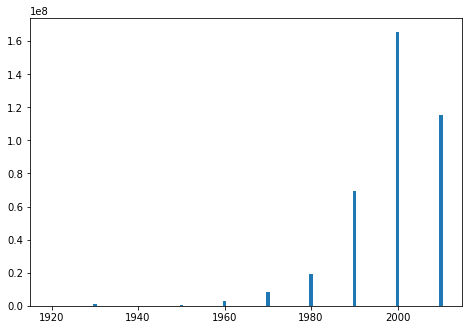

In [206]:
# Write your code for plotting number of voted users vs decade
import seaborn as sns
import matplotlib.pyplot as plt
#ax=sns.barplot(x='decade',y='num_voted_users',data=df_by_decade)
#plt.yscale('log')
#plt.ylabel("num_voted_users")
#plt.xlabel("decade")
#plt.show()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(df_by_decade['decade'],df_by_decade['num_voted_users'])

plt.show()